In [1]:
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf
import scipy.io

import numpy as np
import galois
import networkx as nx

In [3]:
def swap_form(matrix):
    rows = matrix.shape[0]
    return np.concatenate((matrix[:, rows:], matrix[:, :rows]), axis=1)

In [4]:
const_dict = scipy.io.loadmat('constants.mat')
H_test = np.array(const_dict['BCH_test'])
H_32_44 = np.array(const_dict['H_32_44'])
H_4_7 = np.array(const_dict['H_4_7'])

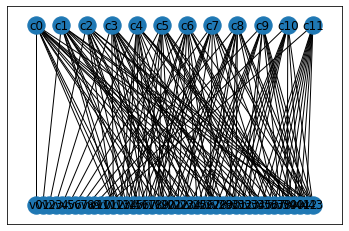

In [5]:
from utils import get_tanner_graph

G, pos = get_tanner_graph(H_32_44)

nx.draw_networkx(G, pos)

In [6]:
from keras.layers import Input
from keras.models import Model

from layers import OutputLayer

In [7]:
inp = Input(shape=(44,))
inp2 = Input(shape=(147,))
out = OutputLayer(G, 'i1')([inp, inp2])
model = Model([inp, inp2], out)

In [8]:
g = tf.random.Generator.from_seed(123)

model.predict([g.normal((1,44)), g.normal((1,147))])

array([[ 1.0290476 , -0.27327296, -2.7077048 , -2.690915  , -0.0758034 ,
         0.13425958,  0.5803953 , -0.910017  , -0.8793427 , -0.12590638,
        -1.0849375 , -1.342677  , -0.09179544, -0.9572464 , -0.5547348 ,
        -1.6698976 , -5.2185926 ,  3.1089208 , -2.6594362 , -3.5446334 ,
         0.2566799 ,  0.6615263 ,  1.5563793 ,  0.64769703, -0.50253654,
        -4.0178213 ,  0.54622525, -0.27089033,  0.56412405, -0.6140879 ,
         2.3995585 ,  4.632931  , -2.054826  ,  0.67971915,  1.4957268 ,
        -5.014406  ,  0.4844767 , -2.3681457 , -0.9964103 , -1.0115905 ,
         1.6300924 ,  3.991035  , -1.941011  ,  3.8898618 ]],
      dtype=float32)